# Pandas groupby

Let's examine a dataframe

In [1]:
import pandas as pd
import numpy as np

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

print(example_df)


   above_three   even  value
a        False  False      1
b        False  False      3
c        False   True      2
d         True   True      4
e        False  False      1
f         True   True      6
g         True   True      4


### Group by one variable

We see that `even` is a variable. Let's group the dataframe using the values of the `even` variable.

In [2]:
grouped_data = example_df.groupby('even')
print('\n')
print(grouped_data.groups)
print(' \nABOVE THREE')
print(grouped_data.count()['above_three'])
print('\n')



{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}
 
ABOVE THREE
even
False    3
True     4
Name: above_three, dtype: int64




### Group by multiple variables



In [3]:
grouped_data = example_df.groupby(['even','above_three'])
print('\n')
print(grouped_data.groups)
print('\n')



{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}




### Get sum of each group

In [4]:
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       above_three  value
even                     
False          0.0      5
True           3.0     16


### Limit columns in result

In [5]:
grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame

print grouped_data.sum()['value']

print '\n' # Blank line to separate results

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.

print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


### Subway data grouped by station

We group the subway data into stations and get the mean ridership for each station.

In [6]:
import os
basepath = os.path.abspath('16_Pandas_groupby.py')
dname = os.path.dirname(basepath)
os.chdir(dname)

# Declare the data file path
if os.environ['COMPUTERNAME'] == 'JDAZO':
    filepath = os.path.normpath(os.path.join(basepath,'..\\..\\..\\data\\' \
                                             'nyc_subway_weather.csv'))
    
elif os.environ['COMPUTERNAME'] == 'MELLOYELLO':
    filepath = os.path.normpath(os.path.join(basepath,'..\\..\\..\\data\\' \
                                             'nyc_subway_weather.csv'))
    
# Load the subway dataset   
subway_df = pd.read_csv(filepath)
    
# Glimpse at the top few records
print(subway_df.head())

   UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0  R003  05-01-11  00:00:00   4388333  2911002              0.0   
1  R003  05-01-11  04:00:00   4388333  2911002              0.0   
2  R003  05-01-11  12:00:00   4388333  2911002              0.0   
3  R003  05-01-11  16:00:00   4388333  2911002              0.0   
4  R003  05-01-11  20:00:00   4388333  2911002              0.0   

   EXITSn_hourly             datetime  hour  day_week     ...       pressurei  \
0            0.0  2011-05-01 00:00:00     0         6     ...           30.22   
1            0.0  2011-05-01 04:00:00     4         6     ...           30.25   
2            0.0  2011-05-01 12:00:00    12         6     ...           30.28   
3            0.0  2011-05-01 16:00:00    16         6     ...           30.26   
4            0.0  2011-05-01 20:00:00    20         6     ...           30.28   

  rain  tempi  wspdi meanprecipi  meanpressurei  meantempi  meanwspdi  \
0    0   55.9    3.5         0.0     

The __`UNIT`__ column seems to contain the station ID, so we'll group by the `UNIT` variable. The **`ENTRIESn_hourly`** variable seems to hold the ridership values. Show the topmost ten stations and their average hourly ridership.

In [7]:
stations = subway_df.groupby('UNIT')
station_ridership = stations['ENTRIESn_hourly'].mean()
print(station_ridership.head(n=5))

UNIT
R003    223.047619
R004    554.302857
R005    551.482558
R006    634.155556
R007    382.147059
Name: ENTRIESn_hourly, dtype: float64


### Subway ridership by day of the week

In [8]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [56]:
subway_df.groupby('day_week')

In [9]:
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [10]:
subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

In [11]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

Let's create a plot to show ridership by day of week



Populating the interactive namespace from numpy and matplotlib




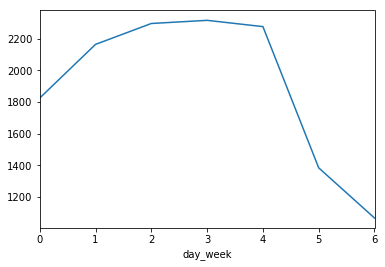

In [12]:
print('\n')

%pylab inline
import seaborn as sns

ridership_by_day.plot()

print('\n')

Ridership is significantly lower in days 5 and 6 (Saturday and Sunday) than during the rest of the week.
